In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering #hierarchialclustering

In [5]:
df= pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.shape

(50, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [9]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820


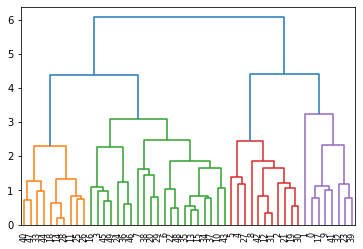

In [10]:
endrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [11]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc


AgglomerativeClustering(linkage='complete', n_clusters=4)

In [12]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [13]:
df['h_clusterid']=pd.Series(y_hc)
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [14]:
result=df.iloc[:,1:].groupby(df.h_clusterid).mean()
result

,Murder,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,,
0,14.087500,252.750000,53.500000,24.537500,0
1,5.871429,134.476190,70.761905,18.580952,1
2,11.054545,264.090909,79.090909,32.618182,2
3,3.180000,78.700000,49.300000,11.630000,3


In [16]:
#kmeans clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [17]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
df_nor = norm_fun(df.iloc[:,1:])
df_nor.describe()

,Murder,Assault,UrbanPop,Rape,h_clusterid
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000,0.486667
std,0.262380,0.285403,0.245335,0.242025,0.331355
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904,0.333333
50%,0.388554,0.390411,0.576271,0.330749,0.333333
75%,0.629518,0.698630,0.775424,0.487726,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
kmeans_clust=KMeans(n_clusters=4)
kmeans_clust.fit(df_norm)

KMeans(n_clusters=4)

In [20]:
kmeans_clust.cluster_centers_[2].reshape(1,4)

array([[-0.96154072, -1.106601  , -0.93010687, -0.96676331]])

In [22]:
df["clusterID"]=pd.Series(kmeans_clust.labels_)
result=df.iloc[:,1:].groupby(df.clusterID).mean()
result

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterID
clusterID,,,,,,
0,13.937500,243.625000,53.750000,21.412500,0.125000,0
1,10.815385,257.384615,76.000000,33.192308,1.769231,1
2,3.600000,78.538462,52.076923,12.176923,2.538462,2
3,5.656250,138.875000,73.875000,18.781250,1.000000,3


In [23]:
k = list(range(2,10))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_nor)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_nor.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_nor.shape[1]),"euclidean")))
    
    print("TWSS when k is",i,sum(WSS))
    TWSS.append(sum(WSS))

TWSS when k is 2 [22.14374885]
TWSS when k is 3 [17.27286232]
TWSS when k is 4 [13.03456921]
TWSS when k is 5 [11.97061003]
TWSS when k is 6 [11.29302775]
TWSS when k is 7 [10.84748016]
TWSS when k is 8 [10.28038363]
TWSS when k is 9 [9.82188478]


Text(0, 0.5, 'total_within_SS')

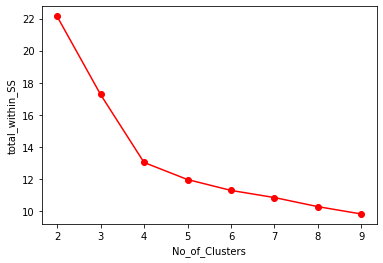

In [24]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [25]:
#DBScan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [27]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterID
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,2,1


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50 non-null     object 
 1   Murder       50 non-null     float64
 2   Assault      50 non-null     int64  
 3   UrbanPop     50 non-null     int64  
 4   Rape         50 non-null     float64
 5   h_clusterid  50 non-null     int64  
 6   clusterID    50 non-null     int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 2.7+ KB
None


In [29]:
array=df.iloc[:,1:].values
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ,   0. ],
       [ 10. , 263. ,  48. ,  44.5,   0. ,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   2. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ,   0. ],
       [  9. , 276. ,  91. ,  40.6,   2. ,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   2. ,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   1. ,   3. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ,   3. ],
       [ 15.4, 335. ,  80. ,  31.9,   2. ,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ,   0. ],
       [  5.3,  46. ,  83. ,  20.2,   1. ,   3. ],
       [  2.6, 120. ,  54. ,  14.2,   3. ,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   2. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ,   3. ],
       [  2.2,  56. ,  57. ,  11.3,   3. ,   2. ],
       [  6. , 115. ,  66. ,  18. ,   1. ,   3. ],
       [  9.7, 109. ,  52. ,  16.3,   1. ,   2. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ,   0. ],
       [  2.1,  83. ,  51. ,   7.8,   3. ,   2. ],
       [ 11.3, 300. ,  67. ,  2

In [30]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.48362952,
        -1.62086791],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.48362952,
        -0.68933463],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.54873968,
        -0.68933463],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.46744492,
        -1.62086791],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.54873968,
        -0.68933463],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.54873968,
        -0.68933463],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.46744492,
         1.17373193],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.46744492,
         1.17373193],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.54873968,
        -0.68933463],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.48362952,
        -1.62086791],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [31]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [32]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [33]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [34]:
df1=pd.concat([df,cl],axis=1)
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterID,cluster
0,Alabama,13.2,236,58,21.2,0,0,-1
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,2,1,-1
3,Arkansas,8.8,190,50,19.5,1,0,-1
4,California,9.0,276,91,40.6,2,1,-1
5,Colorado,7.9,204,78,38.7,2,1,-1
6,Connecticut,3.3,110,77,11.1,1,3,-1
7,Delaware,5.9,238,72,15.8,1,3,-1
8,Florida,15.4,335,80,31.9,2,1,-1
9,Georgia,17.4,211,60,25.8,0,0,-1


In [35]:
result1=df1.iloc[:,1:].groupby(df1.cluster).mean()
result1

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterID,cluster
cluster,,,,,,,
-1,7.923256,177.116279,65.302326,21.627907,1.534884,1.534884,-1
0,6.957143,131.714286,67.000000,18.800000,1.000000,3.000000,0
